<a href="https://colab.research.google.com/github/DINESHDHAKAR1/MLProject/blob/main/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np


In [11]:
train_data = torchvision.datasets.FashionMNIST(root= "data", train= True,download=True,transform= ToTensor())
test_data = torchvision.datasets.FashionMNIST(root= "data", train= False,download=True,transform= ToTensor())

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=100,shuffle=True)

In [13]:
x,y = next(iter(test_loader))

In [14]:
print(x.shape)

torch.Size([100, 1, 28, 28])


In [15]:
class ImageClassifier(nn.Module):
    def __init__(self):
       super().__init__()
       self.modal = nn.Sequential(
        nn.Conv2d(1,32,(3,3)),
        nn.ReLU(),
        nn.Conv2d(32,64,(3,3)),
        nn.ReLU(),
        nn.Conv2d(64,64,(3,3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6),10)
       )

    def forward(self,x) :
        return self.module(x)


In [16]:
clf = nn.Sequential(
        nn.Conv2d(1,32,(3,3)),
        nn.ReLU(),
        nn.Conv2d(32,64,(3,3)),
        nn.ReLU(),
        nn.Conv2d(64,64,(3,3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6),10)
).to('cuda')

In [17]:

opt = torch.optim.Adam(clf.parameters(),lr=1e-3)
loss_fn = nn.CrossEntropyLoss()
clf

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=30976, out_features=10, bias=True)
)

In [19]:
if __name__ =="__main__":
        for epoch in range (10):
              train_loss =0
              for i ,(image,labels) in enumerate(train_loader) :
                image,labels =image.to('cuda'),labels.to('cuda')
                output = clf(image)
                loss = loss_fn(output,labels)
                train_loss +=loss
                opt.zero_grad()
                loss.backward()
                opt.step()
                if (i+1)%100 ==0 :
                  print(f"Epoch[{epoch+1/10}],Loss:{train_loss}")

Epoch[0.1],Loss:71.71219635009766
Epoch[0.1],Loss:117.27133178710938
Epoch[0.1],Loss:157.94105529785156
Epoch[0.1],Loss:194.537841796875
Epoch[0.1],Loss:227.88978576660156
Epoch[0.1],Loss:259.9986877441406
Epoch[1.1],Loss:29.178646087646484
Epoch[1.1],Loss:58.125850677490234
Epoch[1.1],Loss:87.32540893554688
Epoch[1.1],Loss:114.92805480957031
Epoch[1.1],Loss:140.67462158203125
Epoch[1.1],Loss:167.11941528320312
Epoch[2.1],Loss:23.50062370300293
Epoch[2.1],Loss:47.34731674194336
Epoch[2.1],Loss:70.97189331054688
Epoch[2.1],Loss:93.54857635498047
Epoch[2.1],Loss:116.00936889648438
Epoch[2.1],Loss:138.15701293945312
Epoch[3.1],Loss:18.754112243652344
Epoch[3.1],Loss:38.64211654663086
Epoch[3.1],Loss:58.348899841308594
Epoch[3.1],Loss:78.26078796386719
Epoch[3.1],Loss:97.19972229003906
Epoch[3.1],Loss:117.3426742553711
Epoch[4.1],Loss:16.404216766357422
Epoch[4.1],Loss:32.92814636230469
Epoch[4.1],Loss:48.45631790161133
Epoch[4.1],Loss:65.7238998413086
Epoch[4.1],Loss:82.11959838867188
Epo

In [20]:
device = torch.device('cuda')

In [23]:
with torch.no_grad():
  n_correct =[]
  test_loss = 0
  n_sam = len(test_loader.dataset)
  for i ,(image,labels) in enumerate(test_loader) :
                image,labels =image.to('cuda'),labels.to('cuda')
                output = clf(image)
                losses = loss_fn(output,labels)
                train_loss +=losses
                n_correct = torch.softmax(output.squeeze(), dim=0)
  print(n_correct.shape)
  print(n_correct[1])
  print(labels[1])

torch.Size([100, 10])
tensor([1.5193e-03, 5.2031e-18, 1.0358e-09, 5.3708e-10, 5.2189e-06, 2.3055e-29,
        4.2644e-06, 2.0126e-21, 4.3744e-20, 1.9423e-27], device='cuda:0')
tensor(6, device='cuda:0')


In [24]:
pred_classes = n_correct.argmax(dim=1)
pred_classes

tensor([3, 0, 7, 6, 0, 0, 8, 8, 0, 4, 9, 0, 1, 0, 4, 6, 2, 0, 8, 8, 1, 6, 6, 7,
        9, 7, 3, 6, 0, 6, 4, 1, 9, 3, 4, 4, 7, 3, 0, 7, 5, 9, 1, 6, 6, 1, 4, 7,
        5, 0, 6, 7, 1, 9, 0, 7, 6, 6, 3, 7, 6, 6, 7, 9, 5, 7, 0, 4, 4, 0, 8, 8,
        6, 0, 1, 2, 3, 1, 4, 0, 3, 7, 7, 4, 4, 5, 9, 7, 5, 0, 7, 4, 5, 6, 2, 0,
        7, 4, 0, 6], device='cuda:0')

In [25]:
print(labels)

tensor([3, 6, 7, 2, 0, 0, 8, 8, 0, 8, 9, 0, 1, 0, 5, 5, 2, 0, 8, 8, 1, 6, 2, 7,
        9, 7, 8, 6, 0, 2, 4, 1, 9, 3, 2, 4, 7, 0, 0, 7, 5, 9, 1, 6, 6, 1, 4, 7,
        5, 0, 6, 7, 1, 9, 0, 7, 0, 5, 3, 7, 6, 6, 7, 9, 5, 7, 6, 2, 2, 0, 8, 8,
        5, 0, 1, 2, 3, 1, 4, 5, 3, 7, 7, 4, 3, 5, 9, 5, 5, 0, 7, 4, 5, 8, 2, 0,
        9, 2, 5, 4], device='cuda:0')


In [40]:
y=labels.cpu()
y=y.numpy()

In [41]:
tensor=pred_classes.cpu()
arr =tensor.numpy()

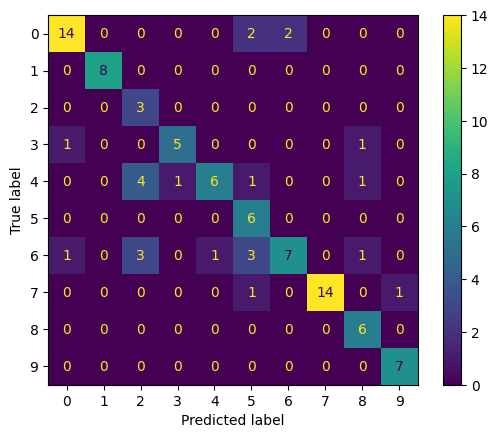

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(arr,y)
ConfusionMatrixDisplay(cm).plot()